In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10


In [3]:
model_path = '/content/drive/MyDrive/models/cifar10_model.h5'
model = load_model(model_path)


In [4]:
(_, _), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_test = x_test.astype('float32') / 255.0
y_test = y_test.flatten()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
num_images = 20
random_indices = np.random.choice(len(x_test), num_images, replace=False)
x_sample = x_test[random_indices]
y_sample = y_test[random_indices]


In [6]:
predictions = model.predict(x_sample)
predicted_labels = np.argmax(predictions, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


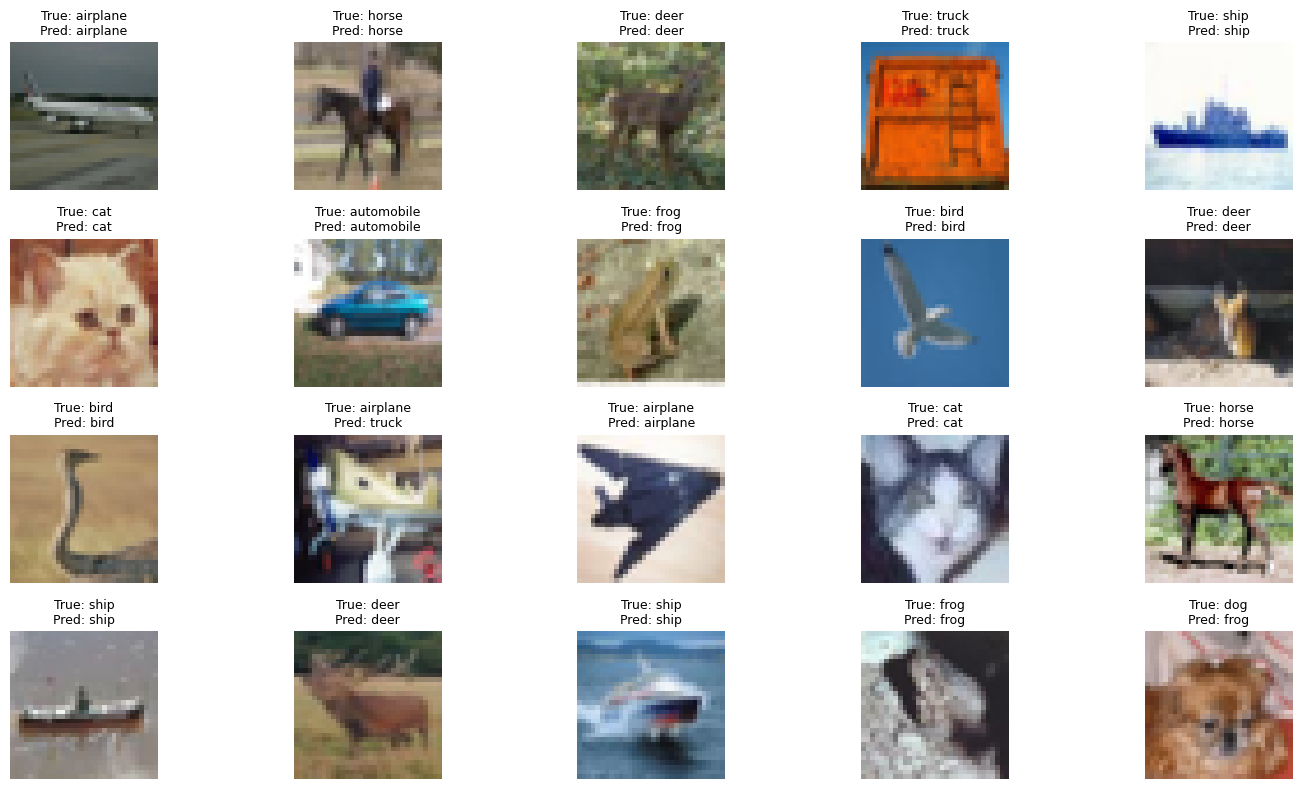

In [8]:
plt.figure(figsize=(15, 8))
for i in range(num_images):
    plt.subplot(4, 5, i+1)
    plt.imshow(x_sample[i])
    true_label = class_names[y_sample[i]]
    pred_label = class_names[predicted_labels[i]]
    plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=9)
    plt.axis('off')
plt.tight_layout()
plt.show()
